| Autor       | Patrick Michel                                           |
|-------------|----------------------------------------------------------|
| 6. Semester | FFHS - Fernfachhochschule Schweiz                        |
| Fach        | AnPy, Analysis mit Python, BSc INF 2017 Pas, BE1-I, FS20 |
| Dozent      | Geuss Markus                                             |

# Inhaltsverzeichnis

* Einführung
* Aufgabenstellung
* Systemanforderungen
* Matplotlib
* Funktionsgraphen
* Balkendiagramme
* Histogramme
* Kreisdiagramme
* Graphen
* Reflexion & Einschätzung
* Verweise


# Einführung

In dieser Arbeit geht es um die Visualisierung von Daten mithilfe der Programmiersprache Python und einigen zusätzlichen Paketen unter anderm Matplotlib und Numpy.

## Aufgabenstellung

Erstellen Sie eine Beispielsammlung von verschiedenen Arten von Graphiken mit Matplotlib; es sollte je ein Beispiel der folgenden Diagrammtypen berücksichtigt werden:

* Funktionsgraphen, 
* Mehrere Funktionsgraphen in der selben Graphik,
* Balkendiagramme,
* Tortendiagramme,
* Histogramme.

## Systemanforderungen

Folgende Voraussetzungen muss die Jupyter Umgebung erfüllen um alle nachfolgenden Codebeispiele ausführen zu können.

* Python 3.7.x, 
* Pip Packages,
    * Matplotlib,
    * NetworkX,
    * Numpy
    * SciPy
    * requests
    * json
    
# Matplotlib

Matplotlib ist ein Paket für die Programmiersprache Python welche es ermöglicht, Daten aller Art auf verschiedenste Weisen graphisch darzustellen. Sie dient als eines der am weitesten verbreiteten Pakete für diesen Zweck im Python Ökosystem. Um die Bibliothek nutzen zu können muss sie zuerst installiert werden. Dies kann über den Paketmanager pip mit folgendem Komando ermöglicht werden:

```console
pip install matplotlib
```

## Numpy

Numpy ist eine sehr beliebte Bibliothek für die Programmiersprache Python welche sehr oft in Kombination mit Matplotlib eingesetzt wird. Sie dient zur einfachen Handhabung von Vektoren, Matritzen und allgemein Arrays. Zusammen mit Matplotlib verfügt es über ein ähnliches Potential wie die Programmierpsrache *R*. Mit folgendem Befehl kann Numpy installiert werden:

```console
pip install numpy
```

Sobald die Pakete erfolgreich installiert wurden können sie mit folgendem Befehl importiert und genutzt werden.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import requests
import json
import networkx as nx

Um nachfolgend die Übersicht zu wahren wurden alle nötigen imports in die erste Sektion geholt. Für eine einfachere Handhabung wird der importierte pyplot der alias *plt* vergeben. Nachfolgend soll die grundlegende Funktionsweise anhand eines einfachen Beispiels verdeutlicht werden [2].

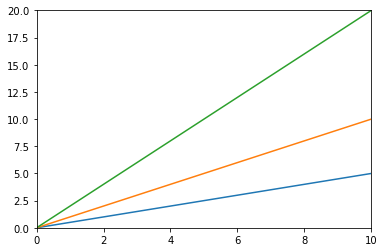

In [10]:
x = np.arange(0, 11)

# flasche lineare Steigung
plt.plot(x, x * 0.5)
# normale lineare Steigung
plt.plot(x, x)
# spitze lineare Steigung
plt.plot(x, x * 2)

plt.axis([0, 10, 0, 20])
plt.show()

## Funktionsgraphen

Funktionsgraphen sind eine graphische Veranschaulichung von Funktionen und deren Input sowei Output. In der Informatik wird bei der Algorithmik viel von den sogenannten Laufzeitklassen gesprochen. Nachfolgend einige der gängigsten Laufzeitklassen aufsteigen sortiert nach der Laufzeit[3]:

\begin{equation}
    \mathcal{O}(1)
\end{equation}
*Die Laufzeit ist immer 1*


\begin{equation}
    \mathcal{O}(log(n))
\end{equation}
*Die Laufzeit ist der Logarithmus von n*


\begin{equation}
    \mathcal{O}(n)
\end{equation}
*Die Laufzeit ist linear n*


\begin{equation}
    \mathcal{O}(n^2)
\end{equation}
*Die Laufzeit ist quadratisch n*


\begin{equation}
    \mathcal{O}(n!)
\end{equation}
*Die Laufzeit ist Fakultät n*

Um diese Graphen und ihr unterschiedliches Wachstum zu verdeutlichen soll folgender Graph dienen.

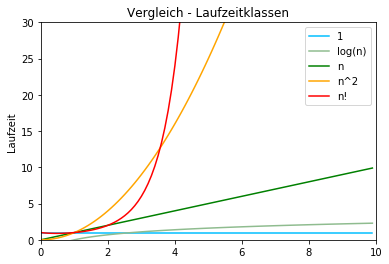

In [11]:
# Erzeuge x Werte von 1 bis 10 in 0.1 Schritten für flachere Verlaufskurven
x = np.arange(0, 10, 0.1)
# Den Graphen und die Y-Achse beschriften
plt.title('Vergleich - Laufzeitklassen')
plt.ylabel('Laufzeit')
plt.axis([0, 10, 0, 30])

# Laufzeit 1
plt.plot(x, np.full(len(x), 1), label='1', color='deepskyblue')
# Laufzeit log(n)
plt.plot(x, np.ma.log(x), label='log(n)', color='darkseagreen')
# Laufzeit n
plt.plot(x, x, label='n', color='green')
# Laufzeit n^2
plt.plot(x, x * x, label='n^2', color='orange')
# Laufzeit n!
plt.plot(x, scipy.special.factorial(x), label='n!', color='red')

plt.legend()
plt.show()

Folgende Besonderheiten sind bei dem Erstellen des Funktionsgraphen aufgetreten:
* Die Farben welche standardmässig verwendet werden sind zum Teil schwer zu unterscheiden. Daher hat jeder Plot eine aussagekräftige Farbe zugeteilt bekommen
* Laufzeit 1: Dadurch, dass der Vektor mit 0 beginnt, kam es bei x/x zu einem Divided by Null Error. Konnte mit *np.full(len(x)* behoben werden
* Laufzeit log(n): Auch wieder das gleiche Problem da log(0) nicht möglich ist. Konnte mit *np.ma.log(x)* maskiert und behoben werden
* Laufzeit n!: Durch die extreme Steigerung musste der Plot auf den Achsen gefixt werden da man sonst nur noch die Laufzeit n! gesehen hätte

## Balkendiagramme

In diesem Abschnitt werden wir uns mit den Balkendiagrammen beschäftigen [4]. Diese Art von Diagrammen wird dazu eingesetzt, Gruppen von Entitäten zu vergleichen. Sei es Stimmen bei einer Wahl pro Kandidat oder in der aktuell andauernden Corona Pandemie der Vergleich von Fallzahlen von verschiedenen Ländern. Um dies zu veranschaulichen kommt nachfolgend ein Beispiel eines Balkendiagramms. Das Beispiel greift aktuelle Daten von einem REST Endpunkt ab und verarbeitet diese danach zu einem Balkendiagramm um die Fallzahlen pro Land zu vergleichen. 

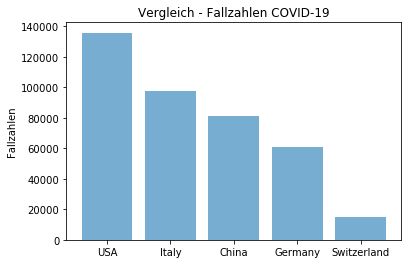

In [12]:
# Titel und y-Achse beschriften
plt.title('Vergleich - Fallzahlen COVID-19')
plt.ylabel('Fallzahlen')

countryfilter = ['Switzerland', 'Italy', 'China', 'Germany', 'USA']

response = requests.get('https://coronavirus-19-api.herokuapp.com/countries')
countries = json.loads(response.content)
# JSON Hashtable filtern nach gesuchten Ländern
countries = [c for c in countries if c['country'] in countryfilter]

# Gefundene Länder absteigend sortieren
countries.sort(key=lambda c: c['cases'], reverse=True)

countrynames = [c['country'] for c in countries]
countrycases = [c['cases'] for c in countries]

plt.bar(countrynames, countrycases, alpha=0.6)

plt.show()

Folgende Besonderheiten sind bei dem Erstellen des Balkendiagramms aufgetreten:
* Die Daten werden von einer API geholt und müssen danach noch entsprechend sortiert werden. Dies geschieht über eine Filterliste
* Die Werte mussten noch sinnvoll absteigend sortiert werden

## Historgramme

In diesem Abschnitt geht es um Histogramme. Diese werden dazu verwendet um auftauchende Häufigkeiten zu visualisieren. Ein klassischer Anwendungsfall ist die Darstellung eines Wahrscheinlichkeitsmass wie zu Beispiel die Normalverteilung, Bernoulli-Verteilung, Binomialverteilung und verschiedene weitere. Wir werden in diesem Beispiel nun die sogenannte Gauss-Verteilung also die Normalverteilung anschauen [5]. Diese ist sehr generell denn schlussendlich konvergieren praktisch alle Wahrscheinlichkeitsmasse früher oder später in einer Normalverteilung.

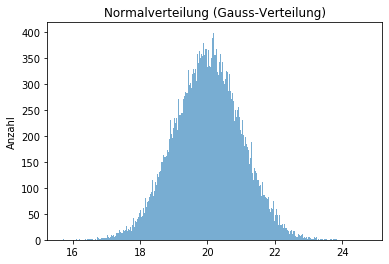

In [13]:
plt.title('Normalverteilung (Gauss-Verteilung)')
plt.ylabel('Anzahl')

# Anzahl zu generierende Zufallswerte
samples = 100000
# Anzahl Gruppierungen
histbins = int(samples * 0.01)

# Generieren der Zufallswerte mit dem Wert 20 als Zentrum der Verteilung
gauss = np.random.normal(size=samples, loc=20)

plt.hist(gauss, bins=histbins, alpha=0.6)
plt.show()

## Kreisdiagramme

Im folgenden Abschnitt geht es um Tortendiagramme. Diese werden häufig dazu verwendet den Anteil von einer Gruppe oder eines Anteilseigners an einer endlichen Menge darzustellen. Somit gibt es bei einem Tortendiagramm immer 100%. Ein klassisches Besipiel ist der Marktanteil einer Firma in einer bestimmten Branche. Dies soll nachfolgend in einem Beispiel aufgezeigt werden. Beim Beispiel handelt es sich um die Marktanteile der grossen 3 Hyperscaler im Public Cloud Bereich AWS, Azure und GCloud im Q4 2019[6]. Andere wird für die restlichen kleineren Hyperscaler verwendet.

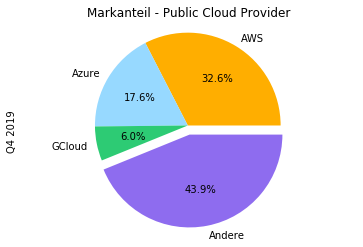

In [14]:
plt.title('Markanteil - Public Cloud Provider')
plt.ylabel('Q4 2019')

# Erstellen der Daten welche aus dem oben referenzierten Artikel entnommen wurden
providers = ['AWS', 'Azure', 'GCloud', 'Andere']
marketshares = [9.8, 5.3, 1.8, 13.2]
colors = ['#FFAE00', '#97D9FF', '#2DCB74', '#8E6CEF']
explode =(0,0,0,0.1)

plt.pie(marketshares, labels=providers, autopct='%1.1f%%', colors=colors, explode=explode)
plt.axis('equal')
plt.show()

## Graphen

Dieser Abschnitt befasst sich mit Graphen und wie diese mithilfe von Matplotlib und dem Paket NetworkX dargestellt werden können. Dies kann verwendet werden um zum Beispiel Beziehungen zwischen Entitäten aufzuzeigen. Das können im menschlichen Sinn Bekanntschaften sein, in der aktuellen Corona Lage Ausbreitungsmuster über Kontakte oder auch im technischen Sinn Netzwerktopologien. EIn Graph besteht aus Knoten und Kanten. Die Knoten repräsentieren Entitäten wie zum Beispiel ein Mensch und die Kanten repräsentieren Relationen in diesem Fall zum Beispiel eine Beziehung. Das folgende Beispiel soll die Ausbreitung des Coronavirus mit einer geschätzten *R(0)* Zahl von 2.0 und deren exponentielles Verbreitungspotential aufzeigen.

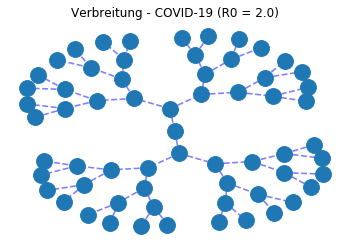

In [15]:
plt.title('Verbreitung - COVID-19 (R0 = 2.0)')

G = nx.Graph()

# doe R0 Zahl welche bestimmt wie stark sich das Virus ausbreitet
r0 = 2

# Rekursive Funktion welche es ermöglicht eine Verbreitung von R0 = 2 zu simulieren
def generate_pandemic(parent, index, generation):
    node = parent + str(index)
    if parent != '':
        G.add_edge('P' + parent, 'P' + node)
    if generation != 0:
        for i in range(1, r0 + 1):
            generate_pandemic(node, i, generation - 1)
            
generate_pandemic('', 1, 5)

# Ordnet die Knoten visuell ansprechend an
pos = nx.kamada_kawai_layout(G)

# Knoten zeichnen
nx.draw_networkx_nodes(G, pos, node_size=250)

# Kanten zeichnen
nx.draw_networkx_edges(G, pos, width=1.6, alpha=0.5, edge_color='b', style='dashed')

plt.axis('off')
plt.show()

Der oben gezeigt Graph zeigt auf, wie sich das Virus über 5 Generationen verbreitet mit der Annahme, dass jeder infizierte wieder zwei weitere infiziert. Daraus ergeben sich dann 64 infizierte.

## Reflexion & Einschätzung

Wie oben gezeigt bieten die vorgestellten Pakete oder Bibliotheken extrem viele Möglichkeiten Daten zu visualisieren. Nicht alle Darstellungsformen machen für alle Daten Sinn daher ist es wichtig die Darstellungsform immer auf die Daten und die daraus zu gewinnenden Daten abzustimmen. Matplotlib ist in Kombination mit Numpy extrem effizient und sehr einfach zu handhaben. Meiner persönlichen Meinung dienen diese Pakete in Kombination als eine Alternative für die Programmiersprache R welche sehr ähnliche Möglichkeiten bietet. Auch ist es sehr wertvoll bestimmte Themen noch einmal programmatisch zu visualisieren. Dazu zählen auch die Laufzeitklassen welche durch das in einem oberen Kapitel erstellten Diagramm extrem gut sichtbar gemacht werden konnten. Auch bietet die Programmiersprache Python sehr viele sprachliche Besonderheiten welche es extrem einfach machen mit Listen zu arbeiten. Die Standarddarstellung der Graphen ist nicht immer extrem aussagekräftig. Daher ist es eigentlich immer nötig diese den eigenen Bedürfnissen anzupassen. Dazu gehört das Anpassen der Farben oder auch das Sortieren der Daten damit sie schlussendlich mehr Sinn ergeben.

‎

‎

‎

‎

‎

‎

## Verweise

* [1]: [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
* [2]: [https://pythonbasics.org/matplotlib-line-chart/](https://pythonbasics.org/matplotlib-line-chart/)
* [3]: [https://de.wikipedia.org/wiki/Landau-Symbole](https://de.wikipedia.org/wiki/Landau-Symbole)
* [4]: [https://bodo-schoenfeld.de/jupyter-notebook-balkendiagramm-erstellen/](https://bodo-schoenfeld.de/jupyter-notebook-balkendiagramm-erstellen/)
* [5]: Findeisen, P. Die Charakterisierung der Normalverteilung nach Gauß. Metrika 29, 55–63 (1982). [https://doi.org/10.1007/BF01893364](https://doi.org/10.1007/BF01893364)
* [6]: [https://www.parkmycloud.com/blog/aws-vs-azure-vs-google-cloud-market-share/](https://www.parkmycloud.com/blog/aws-vs-azure-vs-google-cloud-market-share/)